In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# import missingno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

In [2]:
wine = load_wine()
wine_data = wine.data
wine_label = wine.target

In [3]:
wine_df = pd.DataFrame(data = wine_data, columns = wine.feature_names)
wine_df['label'] = wine.target
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [4]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
train_data['Cabin'].fillna('N', inplace = True)
train_data['Embarked'].fillna('N', inplace = True)

In [7]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train_data['Cabin'].value_counts()

N              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
B101             1
D19              1
C101             1
F38              1
B71              1
Name: Cabin, Length: 148, dtype: int64

In [9]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [10]:
train_data['Cabin'] = train_data['Cabin'].str[:1]
print(train_data['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [11]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

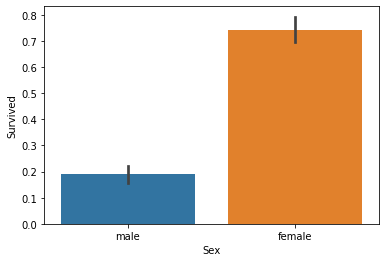

In [12]:
sns.barplot(x = 'Sex', y= 'Survived', data = train_data)

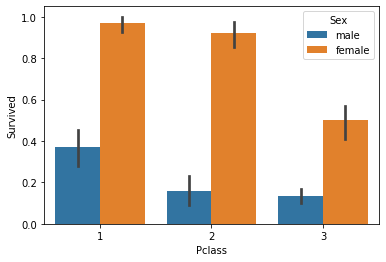

In [13]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_data)

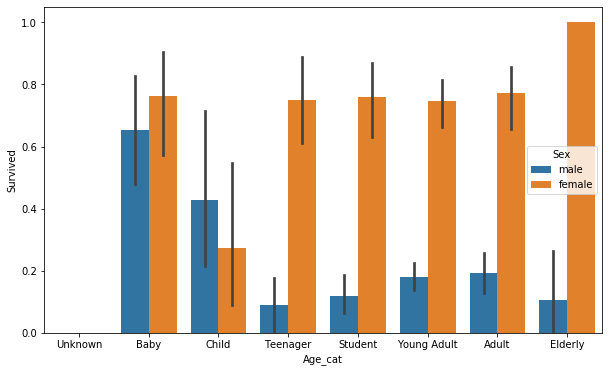

In [14]:
def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

plt.figure(figsize = (10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager','Student', 'Young Adult', 'Adult', 'Elderly' ]
train_data['Age_cat'] = train_data['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = train_data, order=group_names)
train_data.drop('Age_cat', axis = 1, inplace = True)

In [15]:
# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

train_data = encode_features(train_data)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [16]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df - format_features(df)
    return df



In [17]:
train_data = pd.read_csv('./train.csv')

In [18]:
y_train_data = train_data['Survived']
X_train_data = train_data.drop('Survived', axis = 1)

X_train_data = transform_features(X_train_data)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train_data,y_train_data, test_size = 0.2, random_state = 11)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)

0.7877094972067039

In [22]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.8547486033519553

In [23]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test, lr_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8491620111731844

In [24]:
from sklearn.model_selection import KFold
def exec_kfold(clf, folds = 5) :
    kfold = KFold(n_splits = folds)
    
    scores = []
    
    # Kfold교차검증 시행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_train_data)) :
        X_train, X_test = X_train_data.values[train_index], X_train_data.values[test_index]
        y_train, y_test = y_train_data.values[train_index], y_train_data.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)

        scores.append(accuracy)
        print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도 : {0: .4f}".format(mean_score))
    
exec_kfold(dt_clf, folds= 5)
    

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균 정확도 :  0.7823


In [25]:
scores = cross_val_score(dt_clf, X_train_data, y_train_data, cv = 5)

for iter_count, accuracy in enumerate(scores) :
    print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [26]:
parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split' : [2,3,5], 'min_samples_leaf': [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters , scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :' , grid_dclf.best_params_)
print('최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 의사결정나무의 정확도 : {0:.4f}'.format(accuracy))

최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도 : 0.7992
테스트 세트에서의 의사결정나무의 정확도 : 0.8715


In [27]:
############################ 3장 평가 정확도 시작

In [28]:
class MyDummyClassifier(BaseEstimator) :
    
    def fit( self, X, y = None ) : 
        pass ## 아무것도 학습하지 않음
    
    def predict (self, X) :
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] ==1 :
                pred[i] = 0 
            else :
                pred[i] =1
                
            return pred

# a = np.zeros(10)

In [30]:
data = pd.read_csv('./train.csv')
y_data= data['Survived'] ## 종속변수는 생존여부
X_data = data.drop('Survived', axis = 1) ## 그 외 column은 모두 독립변수
X_data = transform_features(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size = 0.2, random_state = 0) ## 학습/검증 데이터 분류

In [31]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.6145


In [ ]:
######################## 끝

In [32]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [33]:
print(wine_df.info()) ## null이 없음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [34]:
wine_df['alcohol'].value_counts()

12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: alcohol, Length: 126, dtype: int64

In [35]:
y_wine_df = wine_df['label']
X_wine_df = wine_df.drop('label', axis = 1)